In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.path.join(os.getcwd(), ".."), ".."))
sys.path.append(parent_dir)


In [2]:
from data_generation.simulations.grid import Grid, fractional_transformation, logistic_transformation
from data_generation.visualization.create_plots import plot_2D_vector_field, create_2D_vectorfield, plot_2D_vector_field_over_grid
from data_generation.models.tech_substitution import TechnologySubstitution
from data_generation.models.tech_substitution import NumericalSolver as TechNumericalSolver
from data_generation.models.general_ode_solver import FitzHughNagumoModel
from data_generation.models.general_ode_solver import NumericalSolver as GenNumericalSolver

In [3]:
def zero_vectorfield(X, Y):
    U = np.zeros_like(X)
    V = np.zeros_like(Y)
    return U, V


In [4]:
def test_vectorfield(X, Y):
    U = Y
    V = -X
    return U, V

In [5]:
myinfbounds = [(0, np.inf), (0, np.inf)]
myresolution = [10, 10]
myeasybounds = [(0,100), (0, 100)]
myeasyresolution = [10, 10]

trafos = [fractional_transformation(3.0), fractional_transformation(3.0)]
infgrid = Grid(myinfbounds, myresolution, trafos)
easygrid = Grid(myeasybounds, myeasyresolution)
    

### Example Plotting Usage

#### Direct Vectorfield Plotting

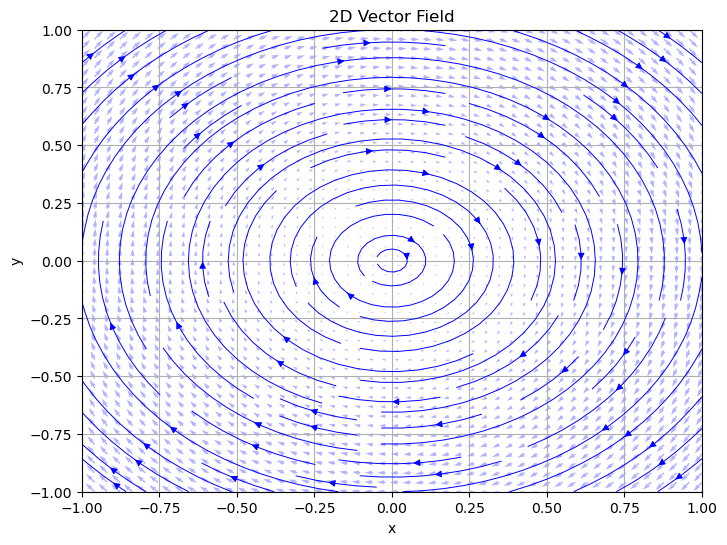

In [6]:
plot_2D_vector_field(test_vectorfield, [[-1, 1], [-1, 1]])

#### Vectorfield from Model over Grid

#### FHN-Model - General ODE Solver

In [7]:
fmodel = FitzHughNagumoModel(control_params=['b','I'])
fsolver = GenNumericalSolver(fmodel)

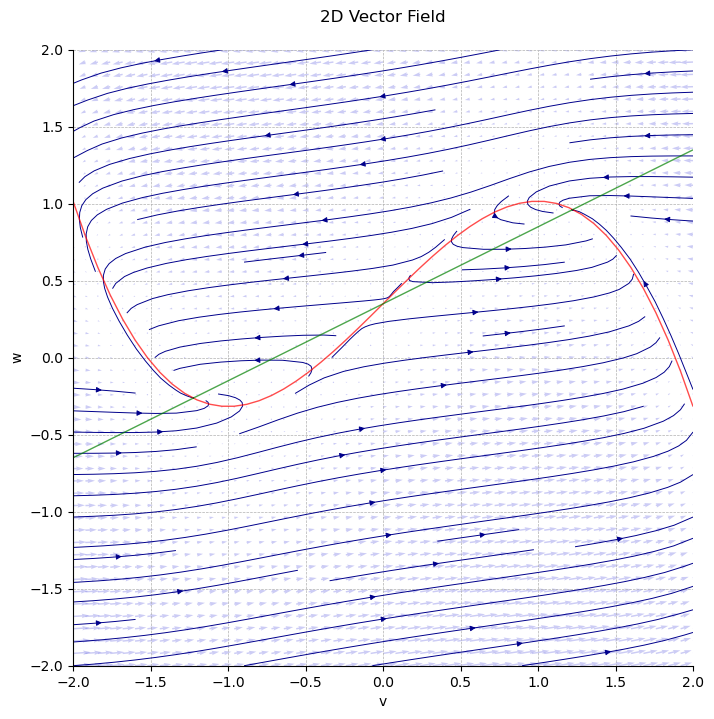

In [9]:
fhnbounds = [(-2,2),(-2,2)]
fhnres = [1000,1000]
fhngrid = Grid(fhnbounds, fhnres)
plot_2D_vector_field_over_grid(fhngrid, fsolver, control = [2.0, 0.35], axis_names=['v','w'], display_nullclines=True)

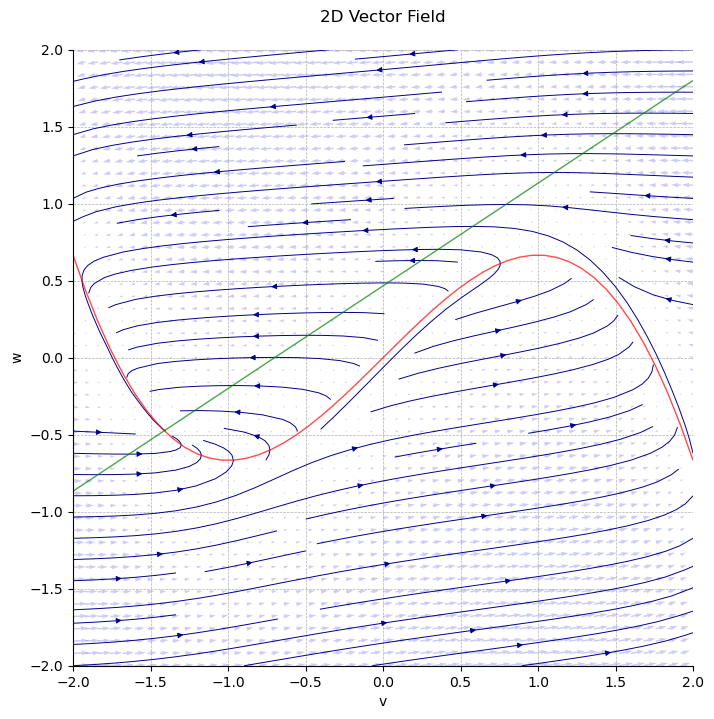

In [10]:
fhnbounds = [(-2,2),(-2,2)]
fhnres = [100,100]
fhngrid = Grid(fhnbounds, fhnres)
plot_2D_vector_field_over_grid(fhngrid, fsolver, control = [1.5, 0.0], axis_names=['v','w'], display_nullclines=True)

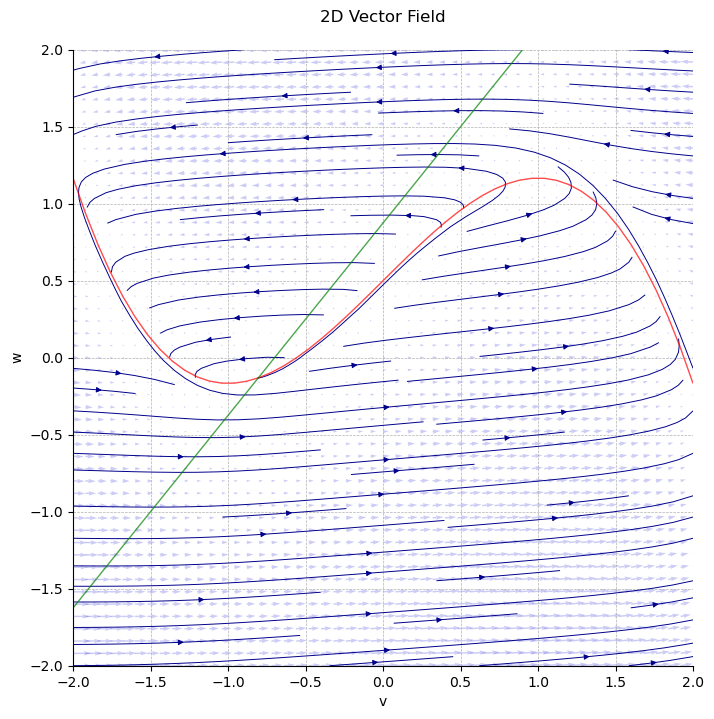

In [11]:
fhnbounds = [(-2,2),(-2,2)]
fhnres = [100,100]
fhngrid = Grid(fhnbounds, fhnres)
plot_2D_vector_field_over_grid(fhngrid, fsolver, control = [0.8, 0.5], axis_names=['v','w'], display_nullclines=True)

#### Technology Substitution

In [12]:
model = TechnologySubstitution(D0=1.0, delta=1.0, sigma=0.2, alpha=0.5, gamma1=1.0)
solver = TechNumericalSolver(model)

In [13]:
np.full((3, 3, 1), 2).shape

(3, 3, 1)

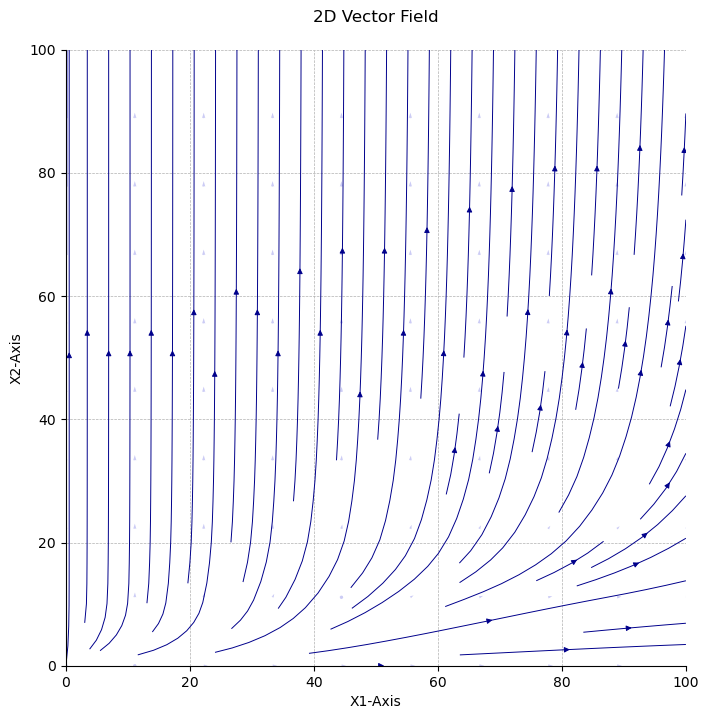

In [ ]:
plot_2D_vector_field_over_grid(easygrid, solver, control=0.5, display_vectorfield=True, resolution = 10)


In [ ]:
title = r"Tech Substitution Model with $\gamma_{2} = 0.5$"
save_to_path = "./figures/tech_sub_05.png"
plot_2D_vector_field_over_grid(infgrid, solver, 1), display_vectorfield=True, resolution=21, title= title, save_to=save_to_path, display_grid=True, display_vectorfield_magnitude=False)



SyntaxError: unmatched ')' (4220477792.py, line 3)

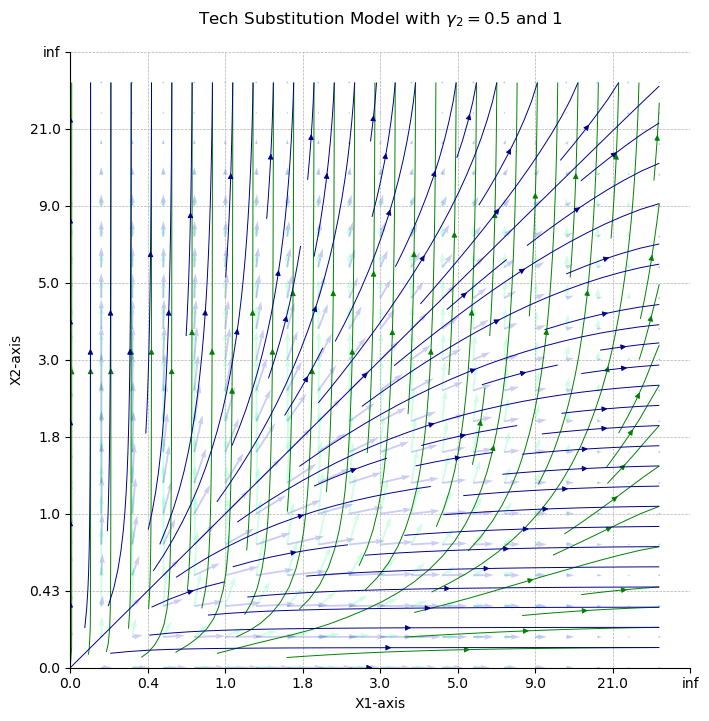

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))

title = r"Tech Substitution Model with $\gamma_{2} = 0.5$ and $1$"
save_to_path = "./figures/tech_sub_mult.png"
plot_2D_vector_field_over_grid(infgrid, solver, 0.5, display_vectorfield=True, resolution=21, title= title, ax= axes, streamplot_colour='green', vectorfield_colour='springgreen')
plot_2D_vector_field_over_grid(infgrid, solver, 1, display_vectorfield=True, resolution=21, title= title, ax= axes)


plt.show()
